# Detecção de objetos com YOLO

Este notebook corresponde a atividade prática da seção 3.8 no livro do curso. Nesta atividade uma versão pré-treinada do YOLO no COCO Dataset é usada para detectar objetos. A forma mais fácil para usar o modelo YOLO é importando o framework [Darkflow](https://github.com/thtrieu/darkflow) (Tensorflow + Darknet). O framework Darknet é escrito em C e CUDA19 e foi usado para a implementação oficial do modelo YOLO. O Darkflow é uma re-implementação em Python do Darknet usando o Tensorflow como base.

Como descreve os comandos abaixo, para instalar o Darkflow basta realizar o download do repositório no [Github](https://github.com/thtrieu/darkflow.git). E em seguida, realizar a instalação do Darknet usando o Pip. Vale ressaltar que é necessário ter o pacote Cython21 instalado.

---
git clone https://github.com/thtrieu/darkflow.git 

cd darkflow

pip3 install .

---

## 1 - Pacotes

Execute o bloco abaixo para importar os pacotes necessarios. 

- [darkflow](https://github.com/thtrieu/darkflow) um framework para machine learning
- [matplotlib](http://matplotlib.org) biblioteca para desenho de gráficos.
- [opecv](http://matplotlib.org) biblioteca para processamento de imagem.

In [1]:
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
import cv2


#código local com a função que desenha as caixas dos objetos detectados
from draw_boxes import *

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 2 -  Configuração do YOLO

Primeiro, é necessário realizar o downlaod dos pesos do YOLO pré-treinado. No [GoogleDrive](https://drive.google.com/drive/folders/0B1tW_VtY7onidEwyQ2FtQVplWEU) do autor do Darknet há um arquivo chamado "yolo.weights", faça o download do arquivo e coloque dentro da pasta "cfg" na raiz desse projeto.

O bloco que seque mostra o código de configuração e instanciação do YOLO. Para isso, é criado um dicionário chamado options, que define os atributos necessários para executar o YOLO pré-treinado no dataset COCO. O atributo "model" especifica o caminho do arquivo "yolo.cfg", que define a arquitetura da CNN usada. O atributo "load" define o caminho para o arquivo "yolo.weights". O atributo "threshold" define o percentual mínimo para confidencia de detecção de objetos, nesse caso só objetos com pelo menos 10% de score de confidencia são retornados. Por fim, um objeto TFNet é instanciado com as opções definidas.

In [2]:
options = {"model": "cfg/yolo.cfg", 
           "load": "cfg/yolo.weights", 
           "threshold": 0.3}

tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading cfg/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.5581560134887695s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep! 

## 3 - Executando exemplos

O bloco abaixo mostra como utilizar o YOLO pré-treinado para detectar objetos em imagens. Na pasta "cfg" deste projeto está o arquivo "coco.names", que especifica o nome das classes dos objetos. Primeiro uma imagem de exemplo é aberta com o opencv e usada como entrada para o YOLO. Em seguida, o resultado é impresso na tela. Note que a saída é uma string codificada em JSON que possui os campos: label, nome da classe; confidence, score de confiança; topleft, posição do canto superior esquerdo da caixa de delimitação; bottomright, posição do canto inferior esquerdo da caixa de delimitação.

[{'label': 'car', 'confidence': 0.874843, 'topleft': {'x': 317, 'y': 153}, 'bottomright': {'x': 557, 'y': 280}}, {'label': 'motorbike', 'confidence': 0.9264005, 'topleft': {'x': 43, 'y': 211}, 'bottomright': {'x': 258, 'y': 364}}]


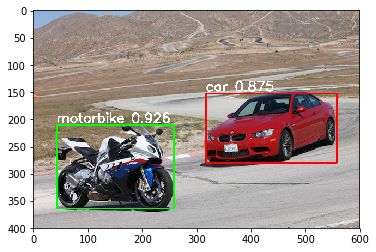

In [3]:
#abrindo uma imagem de exemplo
img = cv2.imread("images/sample1.png")
#o opencv abre a imagem em BGR, necessario converter para RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#realizando a predição dos objetos
result = tfnet.return_predict(img)
print(result)

#exibindo a imagem com os objetos detectados com confidence > 30%
plt.imshow(boxing(img, result))
plt.show()

[{'label': 'person', 'confidence': 0.88553804, 'topleft': {'x': 55, 'y': 99}, 'bottomright': {'x': 238, 'y': 331}}, {'label': 'dog', 'confidence': 0.8809797, 'topleft': {'x': 230, 'y': 112}, 'bottomright': {'x': 414, 'y': 331}}]


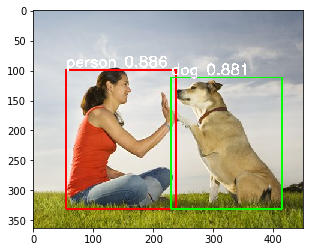

In [4]:
#abrindo uma imagem de exemplo
img = cv2.imread("images/sample2.png")
#o opencv abre a imagem em BGR, necessario converter para RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#realizando a predição dos objetos
result = tfnet.return_predict(img)
print(result)

#exibindo a imagem com os objetos detectados
plt.imshow(boxing(img, result))
plt.show()

[{'label': 'cat', 'confidence': 0.8828768, 'topleft': {'x': 76, 'y': 50}, 'bottomright': {'x': 501, 'y': 398}}, {'label': 'skateboard', 'confidence': 0.53083503, 'topleft': {'x': 217, 'y': 342}, 'bottomright': {'x': 529, 'y': 423}}]


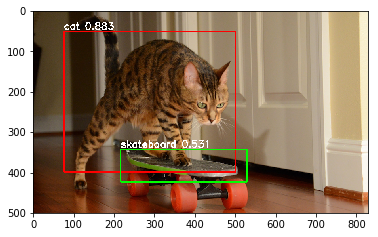

In [5]:
#abrindo uma imagem de exemplo
img = cv2.imread("images/sample3.png")
#o opencv abre a imagem em BGR, necessario converter para RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#realizando a predição dos objetos
result = tfnet.return_predict(img)
print(result)

#exibindo a imagem com os objetos detectados
plt.imshow(boxing(img, result))
plt.show()